# Ordered List Abstract Data Type 

We will now consider a type of list known as an ordered list. For example, if the list of integers shown above were an ordered list (ascending order), then it could be written as 17, 26, 31, 54, 77, and 93. Since 17 is the smallest item, it occupies the first position in the list. Likewise, since 93 is the largest, it occupies the last position.

The structure of an ordered list is a collection of items where each item holds a relative position that is based upon some underlying characteristic of the item. The ordering is typically either ascending or descending and we assume that list items have a meaningful comparison operation that is already defined. Many of the ordered list operations are the same as those of the unordered list.

- OrderedList() creates a new ordered list that is empty. It needs no parameters and returns an empty list.
- add(item) adds a new item to the list making sure that the order is preserved. It needs the item and returns nothing. Assume the item is not already in the list.
- remove(item) removes the item from the list. It needs the item and modifies the list. Assume the item is present in the list.
search(item) searches for the item in the list. It needs the item and returns a boolean value.
- isEmpty() tests to see whether the list is empty. It needs no parameters and returns a boolean value.
- size() returns the number of items in the list. It needs no parameters and returns an integer.
- index(item) returns the position of item in the list. It needs the item and returns the index. Assume the item is in the list.
- pop() removes and returns the last item in the list. It needs nothing and returns an item. Assume the list has at least one item.
- pop(pos) removes and returns the item at position pos. It needs the position and returns the item. Assume the item is in the list.

In order to implement the ordered list, we must remember that the relative positions of the items are based on some underlying characteristic. The ordered list of integers given above (17, 26, 31, 54, 77, and 93) can be represented by a linked structure as shown 

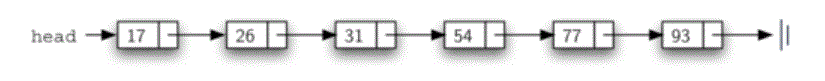

In [2]:
class Node:
    def __init__(self,initdata):
        self.data = initdata
        self.next = None

    def getData(self):
        return self.data

    def getNext(self):
        return self.next

    def setData(self, newdata):
        self.data = newdata

    def setNext(self, newnext):
        self.next = newnext

- The special Python reference value __None__ will play an important role in the Node class and later in the linked list itself. 

- A reference to __None__ will denote the fact that there is no next node.

Note in the __constructor__ that a node is initially created with next set to __None__. 

Since this is sometimes referred to as “grounding the node,” we will use the standard ground symbol to denote a reference that is referring to None. 

It is always a good idea to explicitly assign None to your initial next reference values.

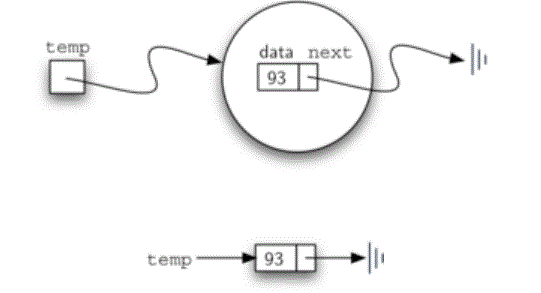

In [3]:
class OrderedList:
    def __init__(self):
        self.head = None

    def search(self,item):
        current = self.head
        found   = False
        stop    = False
        
        while current != None and not found and not stop:
            if current.getData() == item:
                found = True
            else:
                if current.getData() > item:
                    stop = True
                else:
                    current = current.getNext()

        return found

    def add(self,item):
        current  = self.head
        previous = None
        stop     = False
        
        while current != None and not stop:
            if current.getData() > item:
                stop = True
            else:
                previous = current
                current = current.getNext()

        temp = Node(item)
        if previous == None:
            temp.setNext(self.head)
            self.head = temp
        else:
            temp.setNext(current)
            previous.setNext(temp)

    def isEmpty(self):
        return self.head == None

    def size(self):
        current = self.head
        count = 0
        while current != None:
            count = count + 1
            current = current.getNext()

        return count

In [5]:
# initialize the linked list
mylist = OrderedList()

creates the linked list representation shown 

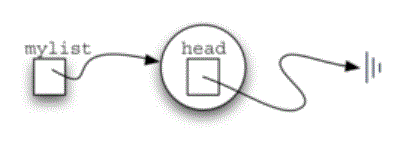

Eventually, 

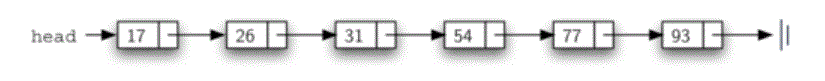

- note that the __isEmpty__ and __size__ methods are as with unordered lists 
- Likewise, the __remove__ method will work just fine since we still need to find the item and then link around the node to remove it. 

- The two remaining methods, __search__ and __add__, will require some modification.

** search **

- The search of an __unordered linked list__ required that we traverse the nodes one at a time until we either find the item we are looking for or run out of nodes (None). 

- For example, the ordered linked list as a search is looking for the value 45. 

- As we traverse, starting at the head of the list, we first compare against 17. Since 17 is not the item we are looking for, we move to the next node, in this case 26. Again, this is not what we want, so we move on to 31 and then on to 54. 

- Now, at this point, something is different. Since 54 is not the item we are looking for, our former strategy would be to move forward. However, due to the fact that this is an ordered list, that will not be necessary. Once the value in the node becomes greater than the item we are searching for, the search can stop and return False.

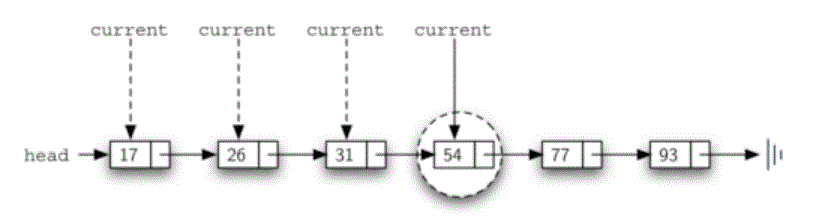

** add ** 

- The most significant method modification will take place in add. Recall that for unordered lists, the add method could simply place a new node at the head of the list. It was the easiest point of access. Unfortunately, this will no longer work with ordered lists. It is now necessary that we discover the specific place where a new item belongs in the existing ordered list.

- Assume we have the ordered list consisting of 17, 26, 54, 77, and 93 and we want to add the value 31. The add method must decide that the new item belongs between 26 and 5

- we need to traverse the linked list looking for the place where the new node will be added. We know we have found that place when either we run out of nodes (current becomes None) or the value of the current node becomes greater than the item we wish to add. In our example, seeing the value 54 causes us to stop.

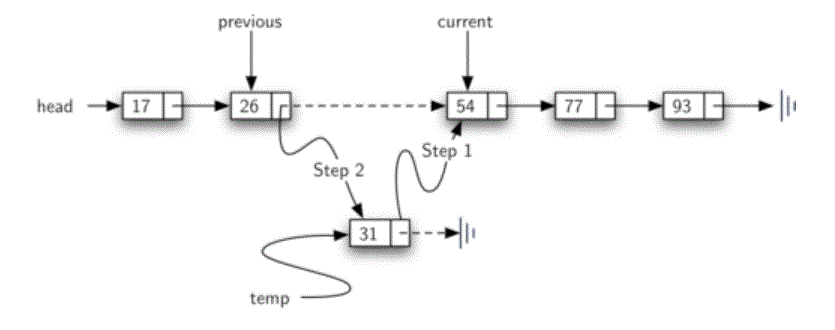

In [7]:
# check if the list is empty
mylist.isEmpty()

True

In [8]:
mylist.add(31)
mylist.add(77)
mylist.add(17)
mylist.add(93)
mylist.add(26)
mylist.add(54)

In [9]:
print(mylist.size())
print(mylist.search(93))
print(mylist.search(100))

6
True
False


In [10]:
mylist.size()

6

In [14]:
# get the head
head = mylist.head

# traverse the list
while head:
    print(head.getData(), end=' -> ')
    head = head.getNext()

print('END')

17 -> 26 -> 28 -> 31 -> 54 -> 77 -> 93 -> END


In [13]:
mylist.add(28)

# Analysis of Linked Lists
- To analyze the complexity of the linked list operations, we need to consider whether they require traversal. 

- Consider a linked list that has n nodes. 

- The __isEmpty__ method is O(1) since it requires one step to check the head reference for __None__. 

- __size__, on the other hand, will always require n steps since there is no way to know how many nodes are in the linked list without traversing from head to end. Therefore, length is O(n). 

- __Adding__ an item to an unordered list will always be O(1) since we simply place the new node at the head of the linked list. 

- However, __search__ and __remove__, as well as __add__ for an ordered list, all require the traversal process. 

- Although on average they may need to traverse only __half__ of the nodes, these methods are all O(n) since in the worst case each will process every node in the list.

You may also have noticed that the performance of this implementation differs from the actual performance given earlier for Python lists. This suggests that linked lists are not the way Python lists are implemented.

The actual implementation of a Python list is based on the notion of an array.